# Apprentissage __supervisé__ : __régression__ linéaire multiple

<img src="Figures/rappels.png">

# Boston Housing Dataset

<img src="Images/osman-rana-xhpMNieqBwA-unsplash.jpg"  width="1080">

<span>Photo by <a href="https://unsplash.com/@osmanrana?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Osman Rana</a> on <a href="https://unsplash.com/s/photos/boston?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

# Importation des librairies

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

# Chargement des données

In [2]:
dataset = load_boston(return_X_y=False)

# Description des données

In [3]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
dataframe = pd.DataFrame(dataset.data, columns=dataset.feature_names)
dataframe['MEDV'] = dataset.target

dataframe.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

# Prédiction de la valeur de biens immobiliers

<img src="Figures/boston_housing_dataset.png">

# Régression linéaire multiple

<img src="Figures/regression_lineaire_multiple.png" width="720">

# Méthodes des moindres carrées

## Fonction erreur à minimiser

### Erreur quadratique moyenne ("*Mean Squared Error, MSE*")

$ MSE = \displaystyle\frac{1}{m} \sum_{i=1}^{m} (y^{i} - (\theta_{0} + \theta_{1} x_{1}^{i} + ... + \theta_{n} x_{n}^{i}))^{2} $

Il faut résoudre l'équation normale :
* $ \Theta = (X^{T}X)^{-1} X^{T} y $

# Préparation des données

In [5]:
X = dataset.data
X.shape

(506, 13)

In [6]:
y = dataset.target
y.shape

(506,)

# Echantillonnage des données

<img src="Figures/split.png"/>

* "*Training Dataset*" ou jeu d'apprentissage : va servir à entrainer le modèle. Dans notre exemple, il va nous permettre de calculer $ \theta_{0} $, $ \theta_{1} $, ..., $ \theta_{n} $.
* "*Test Dataset*" ou jeu de test : va servir à évaluer les performances du modèle, sa capacité à généraliser. Il va permettre de tester si le modèle a bien appris.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

In [8]:
print(X_train.shape)

(404, 13)


In [9]:
print(y_train.shape)

(404,)


In [10]:
print(X_test.shape)

(102, 13)


In [11]:
print(y_test.shape)

(102,)


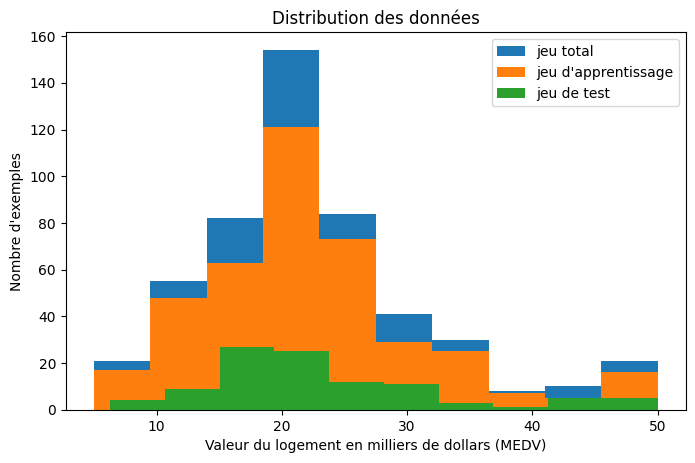

In [12]:
plt.figure(figsize=(8,5), dpi=100)
plt.title("Distribution des données")
plt.hist(y, label="jeu total")
plt.hist(y_train, label="jeu d'apprentissage")
plt.hist(y_test, label="jeu de test")
plt.xlabel("Valeur du logement en milliers de dollars (MEDV)")
plt.ylabel("Nombre d'exemples")
plt.legend()
plt.show()

# Entrainement du modèle

In [13]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

## Paramètres du modèle

* $ \theta_{1}, \theta_{2}, ..., \theta_{n} $

In [14]:
model.coef_.shape

(13,)

In [15]:
model.coef_

array([-1.15966452e-01,  4.71249231e-02,  8.25980146e-03,  3.23404531e+00,
       -1.66865890e+01,  3.88410651e+00, -1.08974442e-02, -1.54129540e+00,
        2.93208309e-01, -1.34059383e-02, -9.06296429e-01,  8.80823439e-03,
       -4.57723846e-01])

* $ \theta_{0} $

In [16]:
model.intercept_

35.55487453600642

# Performances du modèle sur le jeu d'apprentissage

In [17]:
y_predict_train = model.predict(X_train)

## Erreur quadratique moyenne

$ MSE = \displaystyle\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2} $

In [18]:
MSE_train = mean_squared_error(y_train, y_predict_train)

In [19]:
print("L'erreur quadratique moyenne vaut :", MSE_train.round(2))

L'erreur quadratique moyenne vaut : 21.2


## Racine carrée de l'erreur quadratique moyenne

$ RMSE = \displaystyle\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2}} $

In [20]:
RMSE_train = mean_squared_error(y_train, y_predict_train, squared=False)

In [21]:
print("La racine carrée de l'erreur quadratique moyenne vaut :", RMSE_train.round(2))

La racine carrée de l'erreur quadratique moyenne vaut : 4.6


## Coefficient de détermination

$ R^{2} = 1 - \displaystyle\frac{\sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2}}{\sum_{i=1}^{n} (y_{i} - \bar{y})^{2}} $

In [22]:
R_squared_train = 1.0 - (np.sum((y_train - y_predict_train)**2) / np.sum((y_train - np.mean(y_train))**2))

In [23]:
print("Le coefficient de détermination vaut :", R_squared_train.round(4))

Le coefficient de détermination vaut : 0.7415


### Autre méthode pour calculer le coefficient de détermination (non recommandée)

In [24]:
R_squared_train_bis = r2_score(y_train, y_predict_train)

In [25]:
print("Le coefficient de détermination vaut :", R_squared_train_bis.round(4))

Le coefficient de détermination vaut : 0.7415


## Droite de régression

$ y = a * x + b $

In [26]:
a_train, b_train = np.polyfit(y_train, y_predict_train, 1)

In [27]:
print("Le coefficient directeur de la droite vaut :", a_train.round(2))

Le coefficient directeur de la droite vaut : 0.74


In [28]:
print("L'ordonnée à l'origine de la droite vaut:", b_train.round(2))

L'ordonnée à l'origine de la droite vaut: 5.76


## Synthèse des performances du modèle sur le jeu d'apprentissage

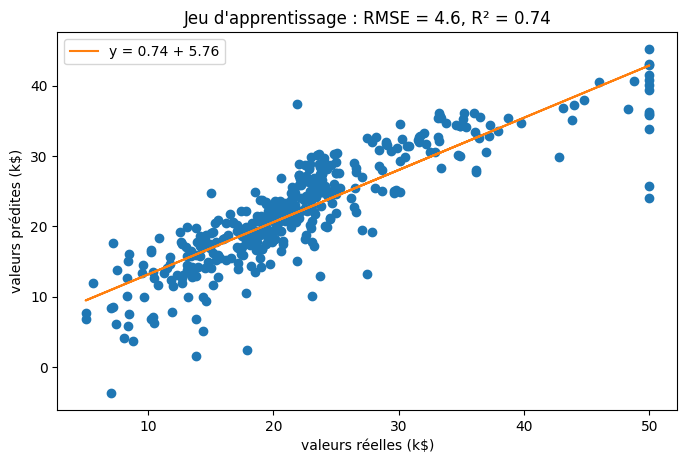

In [29]:
plt.figure(figsize=(8,5), dpi=100)
plt.title("Jeu d'apprentissage : RMSE = " + str(RMSE_train.round(2)) + ", R² = " + str(R_squared_train.round(2)))
plt.plot(y_train, y_predict_train, 'o')
plt.plot(y_train, a_train * y_train + b_train, label="y = " + str(a_train.round(2)) + " + " + str(b_train.round(2)))
#plt.plot(y_train, y_train, label="y = x")
plt.xlabel("valeurs réelles (k$)")
plt.ylabel("valeurs prédites (k$)")
plt.legend()
plt.show()

# Performances du modèle sur le jeu de test

In [30]:
y_predict_test = model.predict(X_test)

## Erreur quadratique moyenne

$ MSE = \displaystyle\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2} $

In [31]:
MSE_test = mean_squared_error(y_test, y_predict_test)

In [32]:
print("L'erreur quadratique moyenne vaut :", MSE_test.round(2))

L'erreur quadratique moyenne vaut : 25.42


## Racine carrée de l'erreur quadratique moyenne

$ RMSE = \displaystyle\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2}} $

In [33]:
RMSE_test = mean_squared_error(y_test, y_predict_test, squared=False)

In [34]:
print("La racine carrée de l'erreur quadratique moyenne vaut :", RMSE_test.round(2))

La racine carrée de l'erreur quadratique moyenne vaut : 5.04


## Coefficient de détermination

$ R^{2} = 1 - \displaystyle\frac{\sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2}}{\sum_{i=1}^{n} (y_{i} - \bar{y})^{2}} $

In [35]:
R_squared_test = 1.0 - (np.sum((y_test - y_predict_test)**2) / np.sum((y_test - np.mean(y_test))**2))

In [36]:
print("Le coefficient de détermination vaut :", R_squared_test.round(4))

Le coefficient de détermination vaut : 0.7263


### Autre méthode pour calculer le coefficient de détermination (non recommandée)

In [37]:
R_squared_test_bis = r2_score(y_test, y_predict_test)

In [38]:
print("Le coefficient de détermination vaut :", R_squared_test_bis.round(4))

Le coefficient de détermination vaut : 0.7263


## Droite de régression

$ y = a * x + b $

In [39]:
a_test, b_test = np.polyfit(y_test, y_predict_test, 1)

In [40]:
print("Le coefficient directeur de la droite vaut :", a_test.round(2))

Le coefficient directeur de la droite vaut : 0.68


In [41]:
print("L'ordonnée à l'origine de la droite vaut:", b_test.round(2))

L'ordonnée à l'origine de la droite vaut: 7.42


## Synthèse des performances du modèle sur le jeu de test

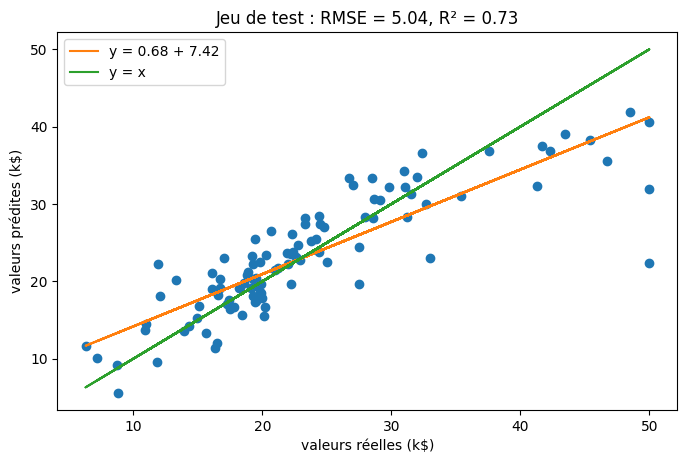

In [42]:
plt.figure(figsize=(8,5), dpi=100)
plt.title("Jeu de test : RMSE = " + str(RMSE_test.round(2)) + ", R² = " + str(R_squared_test.round(2)))
plt.plot(y_test, y_predict_test, 'o')
plt.plot(y_test, a_test * y_test + b_test, label="y = " + str(a_test.round(2)) + " + " + str(b_test.round(2)))
plt.plot(y_test, y_test, label="y = x")
plt.xlabel("valeurs réelles (k$)")
plt.ylabel("valeurs prédites (k$)")
plt.legend()
plt.show()